## 1. DLinear 모델 

DLinear 모델은 시계열 데이터의 예측을 위해 설계된 딥러닝 모델

주로 롱 시퀀스 예측(Long Sequence Forecasting) 문제에서 사용됩니다. 

"DLinear"는 "Decomposition-based Linear Model"의 약자

시계열 데이터를 분해하여 보다 단순한 선형 회귀를 통해 예측하는 접근 방식

이 모델은 특히 복잡한 모델이 오히려 예측 성능을 저하할 수 있는 긴 시계열 문제에서 효과적인 성능을 보이는 것으로 알려져 있습니다.

In [ ]:
# DLinear 클래스는 input_size를 받아서 output_size로 변환하는 두 개의 선형 레이어 (trend_linear와 seasonality_linear)를 가지고 있습니다.
# 모델은 입력 데이터를 **추세(trend)**와 **계절성(seasonality)**으로 분해하여 예측하는 방식으로 동작합니다.
# forward 함수는 주어진 입력 x를 추세와 계절성 레이어에 각각 통과시키고, 그 결과를 합산하여 최종 예측 값을 만듭니다.

In [ ]:
# 데이터 준비
# input_size는 10이고, output_size는 1입니다. 즉, 입력 데이터의 길이는 10이며, 이를 하나의 출력 값으로 예측하려고 합니다.
# x는 크기 (1, 10)인 난수로 생성된 입력 데이터입니다. 이는 배치 크기 1, 길이 10인 벡터입니다.

In [ ]:
# 모델 및 학습 설정
# DLinear 객체 dmodel을 생성하여 모델을 초기화합니다.
# nn.MSELoss()는 평균 제곱 오차(MSE) 손실 함수를 사용해 모델의 예측 값과 실제 값 사이의 오차를 계산합니다.
# optim.SGD는 **확률적 경사하강법(SGD)**을 사용해 모델의 파라미터를 업데이트하는 최적화기입니다. 학습률은 0.01로 설정되어 있습니다.

In [ ]:
# 단일 학습 스텝 실행
# y_true는 모델이 예측하고자 하는 실제 값으로, 크기 (1, 1)인 난수로 생성되었습니다.
# optimizer.zero_grad()는 이전 학습에서 계산된 기울기를 초기화합니다.
# y_pred = dmodel(x)는 모델을 통해 예측 값을 계산합니다.
# loss = criterion(y_pred, y_true)를 통해 예측 값과 실제 값 사이의 손실을 계산합니다.
# loss.backward()는 손실 함수에 대한 기울기를 계산하는 과정입니다. 이를 통해 각 파라미터의 변화 방향을 알 수 있습니다.
# optimizer.step()은 앞에서 계산된 기울기를 사용해 모델의 파라미터를 업데이트합니다.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

class DLinear(nn.Module):
    def __init__(self, input_size, output_size):
        super(DLinear, self).__init__()
        # 선형 레이어를 사용하여 추세와 계절성을 학습합니다.
        self.trend_linear = nn.Linear(input_size, output_size)
        self.seasonality_linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        # 입력 x를 추세와 계절성으로 분해하여 예측
        trend = self.trend_linear(x)
        seasonality = self.seasonality_linear(x)
        return trend + seasonality

# 데이터 예시 (배치 크기: 1, 입력 길이: 10)
input_size = 10
output_size = 1
x = torch.randn(1, input_size)

dmodel = DLinear(input_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(dmodel.parameters(), lr=0.01)

# 학습 예시 (단일 스텝)
y_true = torch.randn(1, output_size)  # 실제 값
optimizer.zero_grad()
y_pred = dmodel(x)  # 예측 값
loss = criterion(y_pred, y_true)  # 손실 계산
loss.backward()  # 역전파
optimizer.step()  # 가중치 업데이트

print(f'예측 값: {y_pred.item()}, 손실 값: {loss.item()}')


예측 값: -0.9445228576660156, 손실 값: 0.5596442222595215


In [2]:
# 출력 결과

# print(f'예측 값: {y_pred.item()}, 손실 값: {loss.item()}')는 학습 후 예측 값(y_pred)과 손실 값(loss)을 출력합니다.
# 예측 값: 모델이 입력 데이터를 바탕으로 계산한 예측 값입니다.
# 손실 값: 예측 값과 실제 값 사이의 오차를 의미하며, 이 값이 작을수록 모델의 예측이 정확하다는 것을 나타냅니다.

In [4]:
# 예측 값의 의미

# 예측 값 (y_pred.item()):  이 값은 삼성전자의 주가 수익률을 예측한 결과입니다. 

#     구체적으로, 최근 10일간의 수익률 데이터를 입력으로 받아서 다음 날의 수익률(즉, 종가가 얼마나 변동할지를 비율로 나타낸 값)을 예측한 것입니다.

# 예를 들어, 예측 값이 0.33이면 이는 주가가 다음 날 33% 상승할 것으로 예상한다는 의미입니다. 반대로 예측 값이 -0.02라면 주가가 2% 하락할 것으로 예측하는 것입니다.

## 2. 삼성전자 일별 데이터

In [ ]:
# 요소	설명
# 데이터	삼성전자 일별 종가 (pykrx), 수익률(pct_change())
# 입력	과거 10일 수익률
# 타깃	다음 날 수익률
# 모델	DLinear = trend + seasonality 선형 예측
# 출력	학습 손실 그래프 + 다음 날 수익률 예측값

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\pykrx\__init__.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
C:\Users\JYB\AppData\Local\Temp\ipykernel_24544\344271469.py:39: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  X = torch.tensor(X, dtype=torch.float32)


📘 Epoch 10/100, Loss: 0.000636
📘 Epoch 20/100, Loss: 0.001550
📘 Epoch 30/100, Loss: 0.000677
📘 Epoch 40/100, Loss: 0.000313
📘 Epoch 50/100, Loss: 0.000373
📘 Epoch 60/100, Loss: 0.000323
📘 Epoch 70/100, Loss: 0.000301
📘 Epoch 80/100, Loss: 0.000301
📘 Epoch 90/100, Loss: 0.000301
📘 Epoch 100/100, Loss: 0.000301


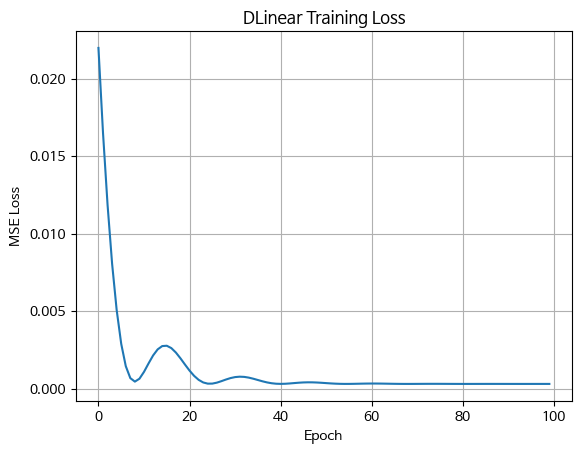


🔮 다음날 수익률 예측: 0.00072


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from pykrx import stock
import matplotlib.pyplot as plt

# 1. 삼성전자 주가 데이터 가져오기 (pykrx 사용)
df = stock.get_market_ohlcv_by_date("2023-01-01", "2025-06-25", "005930")
df = df[["종가"]].rename(columns={"종가": "Close"})

# 2. 수익률 계산 및 결측 제거
df["Return"] = df["Close"].pct_change()
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# 3. DLinear 모델 정의
class DLinear(nn.Module):
    def __init__(self, input_size, output_size):
        super(DLinear, self).__init__()
        self.trend_linear = nn.Linear(input_size, output_size)
        self.seasonality_linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        trend = self.trend_linear(x)
        seasonality = self.seasonality_linear(x)
        return trend + seasonality

# 4. 학습용 슬라이딩 윈도우 데이터 생성
input_size = 10
output_size = 1

X, y = [], []
returns = df["Return"].values
for i in range(len(returns) - input_size):
    X.append(returns[i:i + input_size])
    y.append(returns[i + input_size])
    
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# 5. 모델, 손실함수, 옵티마이저 설정
model = DLinear(input_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 6. 학습 루프
epochs = 100
losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (epoch + 1) % 10 == 0:
        print(f"📘 Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.6f}")

# 7. 학습 손실 시각화
plt.plot(losses)
plt.title("DLinear Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

# 8. 마지막 시점의 예측값 출력
model.eval()
with torch.no_grad():
    latest_input = torch.tensor(returns[-input_size:], dtype=torch.float32).view(1, -1)
    prediction = model(latest_input).item()
    print(f"\n🔮 다음날 수익률 예측: {prediction:.5f}")


In [ ]:
# 요소	설명
# 데이터	삼성전자 일별 종가 (pykrx), 수익률(pct_change())
# 입력	과거 30일 수익률
# 타깃	다음 날 수익률
# 모델	DLinear = trend + seasonality 선형 예측
# 출력	학습 손실 그래프 + 다음 날 수익률 예측값

📘 Epoch 10/100, Loss: 0.000343
📘 Epoch 20/100, Loss: 0.000309
📘 Epoch 30/100, Loss: 0.000294
📘 Epoch 40/100, Loss: 0.000293
📘 Epoch 50/100, Loss: 0.000292
📘 Epoch 60/100, Loss: 0.000291
📘 Epoch 70/100, Loss: 0.000291
📘 Epoch 80/100, Loss: 0.000291
📘 Epoch 90/100, Loss: 0.000291
📘 Epoch 100/100, Loss: 0.000291


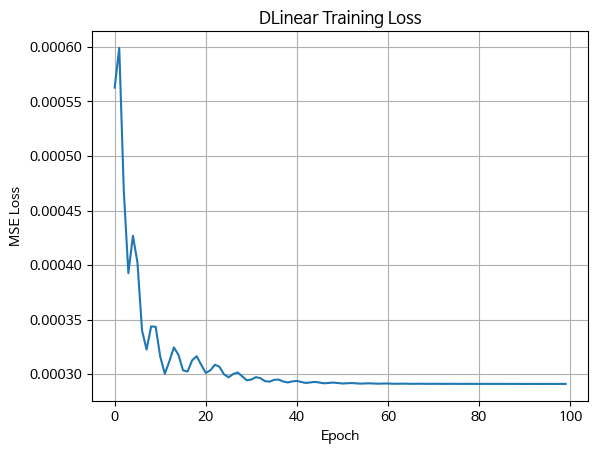


🔮 다음날 수익률 예측: 0.00432


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from pykrx import stock
import matplotlib.pyplot as plt

# 1. 삼성전자 주가 데이터 가져오기 (pykrx 사용)
df = stock.get_market_ohlcv_by_date("2023-01-01", "2025-06-25", "005930")
df = df[["종가"]].rename(columns={"종가": "Close"})

# 2. 수익률 계산 및 결측 제거
df["Return"] = df["Close"].pct_change()
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# 3. DLinear 모델 정의
class DLinear(nn.Module):
    def __init__(self, input_size, output_size):
        super(DLinear, self).__init__()
        self.trend_linear = nn.Linear(input_size, output_size)
        self.seasonality_linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        trend = self.trend_linear(x)
        seasonality = self.seasonality_linear(x)
        return trend + seasonality

# 4. 학습용 슬라이딩 윈도우 데이터 생성 : 과거 30일
input_size = 30
output_size = 1

X, y = [], []
returns = df["Return"].values
for i in range(len(returns) - input_size):
    X.append(returns[i:i + input_size])
    y.append(returns[i + input_size])
    
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# 5. 모델, 손실함수, 옵티마이저 설정
model = DLinear(input_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 6. 학습 루프
epochs = 100
losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (epoch + 1) % 10 == 0:
        print(f"📘 Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.6f}")

# 7. 학습 손실 시각화
plt.plot(losses)
plt.title("DLinear Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

# 8. 마지막 시점의 예측값 출력
model.eval()
with torch.no_grad():
    latest_input = torch.tensor(returns[-input_size:], dtype=torch.float32).view(1, -1)
    prediction = model(latest_input).item()
    print(f"\n🔮 다음날 수익률 예측: {prediction:.5f}")

### 테스트셋 분리 + 성능 검증

In [9]:
from sklearn.model_selection import train_test_split

# 데이터 분리 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # 시계열이므로 시간순 유지
)

# 모델 학습
model = DLinear(input_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

# 예측 수행
model.eval()
with torch.no_grad():
    y_pred = model(X_test).squeeze().numpy()
    y_true = y_test.squeeze().numpy()


### 성능 지표 계산 (Sharpe, R², MAE 등)

In [10]:
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# MAE
mae = mean_absolute_error(y_true, y_pred)

# R²
r2 = r2_score(y_true, y_pred)

# Sharpe Ratio
risk_free_rate = 0.00008
excess_returns = y_pred - risk_free_rate
sharpe_ratio = np.mean(excess_returns) / np.std(excess_returns)

print(f"📊 MAE: {mae:.6f}, R²: {r2:.4f}, Sharpe Ratio: {sharpe_ratio:.4f}")


📊 MAE: 0.014612, R²: -0.0685, Sharpe Ratio: 0.0587


### LSTM 모델 예시

In [11]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=32, output_size=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.unsqueeze(-1)  # (batch, seq_len, 1)
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # 마지막 시점
        return out


### Transformer 기반 예시

In [12]:
class TransformerModel(nn.Module):
    def __init__(self, input_size, d_model=64, nhead=4, num_layers=2):
        super().__init__()
        self.embedding = nn.Linear(1, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(d_model, 1)

    def forward(self, x):
        x = x.unsqueeze(-1)  # (batch, seq_len, 1)
        x = self.embedding(x)  # (batch, seq_len, d_model)
        x = x.permute(1, 0, 2)  # Transformer expects (seq_len, batch, d_model)
        x = self.transformer(x)
        out = x[-1]  # 마지막 시점 출력
        return self.fc(out)


## Transformer 기반 시계열 수익률 예측

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


📘 Epoch 10/100, Loss: 0.147136
📘 Epoch 20/100, Loss: 0.006074
📘 Epoch 30/100, Loss: 0.008517
📘 Epoch 40/100, Loss: 0.008443
📘 Epoch 50/100, Loss: 0.006559
📘 Epoch 60/100, Loss: 0.005141
📘 Epoch 70/100, Loss: 0.004661
📘 Epoch 80/100, Loss: 0.004522
📘 Epoch 90/100, Loss: 0.004188
📘 Epoch 100/100, Loss: 0.003835


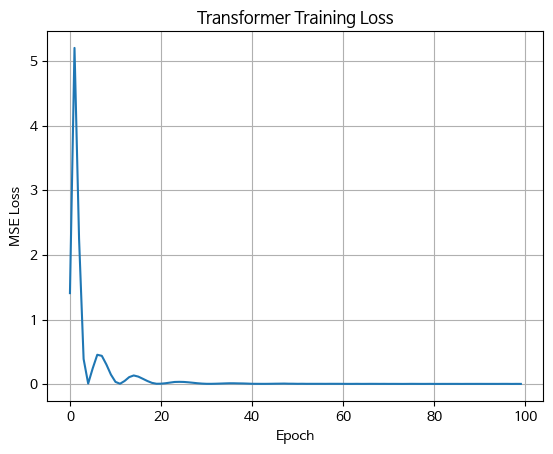


✅ Transformer 성능 지표
• MAE: 0.016284
• R²: -0.2975
• Sharpe Ratio: -24.0284


In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from pykrx import stock
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ⚙️ 하이퍼파라미터 설정
input_size = 10
output_size = 1
d_model = 64
nhead = 4
num_layers = 2
lr = 0.001
epochs = 100

# 📈 데이터 로딩 (삼성전자)
df = stock.get_market_ohlcv_by_date("2023-01-01", "2025-06-25", "005930")
df = df[["종가"]].rename(columns={"종가": "Close"})
df["Return"] = df["Close"].pct_change()
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# 🧾 시계열 윈도우 생성
returns = df["Return"].values
X, y = [], []
for i in range(len(returns) - input_size):
    X.append(returns[i:i + input_size])
    y.append(returns[i + input_size])

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# 🔀 학습/테스트 분리 (시간 순서 유지)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 🧠 Transformer 모델 정의
class TransformerModel(nn.Module):
    def __init__(self, input_size, d_model, nhead, num_layers):
        super().__init__()
        self.embedding = nn.Linear(1, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(d_model, 1)

    def forward(self, x):
        x = x.unsqueeze(-1)  # (batch, seq_len, 1)
        x = self.embedding(x)  # (batch, seq_len, d_model)
        x = x.permute(1, 0, 2)  # Transformer expects (seq_len, batch, d_model)
        x = self.transformer(x)
        out = x[-1]  # 마지막 시점만 예측
        return self.fc(out)

# 🔧 모델 초기화
model = TransformerModel(input_size=input_size, d_model=d_model, nhead=nhead, num_layers=num_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

# 🔁 학습 루프
losses = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (epoch + 1) % 10 == 0:
        print(f"📘 Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.6f}")

# 📉 학습 손실 시각화
plt.plot(losses)
plt.title("Transformer Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

# 📊 평가
model.eval()
with torch.no_grad():
    y_pred = model(X_test).squeeze().numpy()
    y_true = y_test.squeeze().numpy()

# 📈 성능 지표
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
rf = 0.00008  # 무위험 수익률
sharpe = np.mean(y_pred - rf) / np.std(y_pred - rf)

print(f"\n✅ Transformer 성능 지표")
print(f"• MAE: {mae:.6f}")
print(f"• R²: {r2:.4f}")
print(f"• Sharpe Ratio: {sharpe:.4f}")


### DLinear vs Transformer 성능 비교 그래프

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


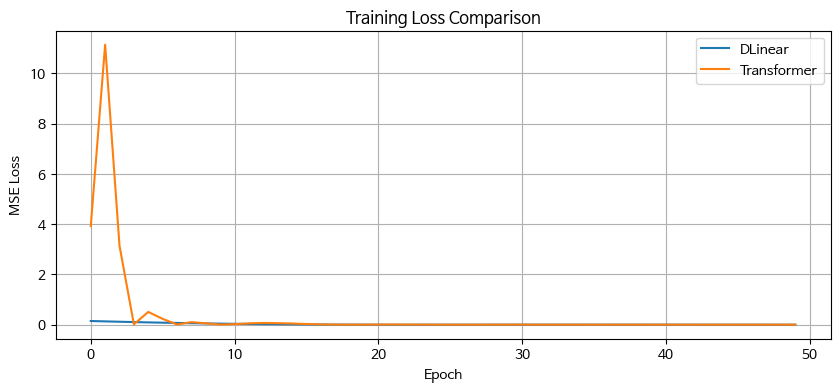

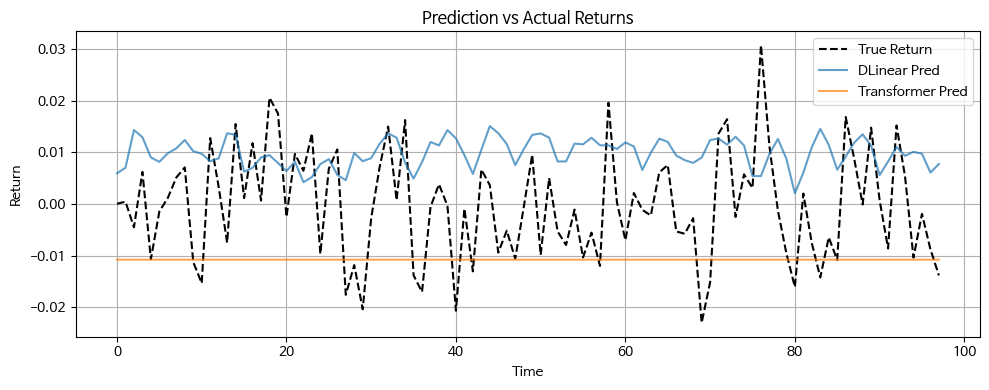

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# 생성된 시계열 데이터 (가정 데이터로 대체)
np.random.seed(42)
returns = np.random.normal(0, 0.01, size=500)

# 학습 파라미터
input_size = 10
output_size = 1
epochs = 50
lr = 0.01

# 시계열 윈도우 생성
X, y = [], []
for i in range(len(returns) - input_size):
    X.append(returns[i:i + input_size])
    y.append(returns[i + input_size])

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# DLinear 모델
class DLinear(nn.Module):
    def __init__(self, input_size, output_size):
        super(DLinear, self).__init__()
        self.trend = nn.Linear(input_size, output_size)
        self.seasonality = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.trend(x) + self.seasonality(x)

# Transformer 모델
class TransformerModel(nn.Module):
    def __init__(self, input_size, d_model=64, nhead=4, num_layers=2):
        super().__init__()
        self.embed = nn.Linear(1, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(d_model, 1)

    def forward(self, x):
        x = x.unsqueeze(-1)
        x = self.embed(x)
        x = x.permute(1, 0, 2)
        x = self.encoder(x)
        return self.fc(x[-1])

# 학습 함수
def train_model(model, X_train, y_train, epochs=50, lr=0.01):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    losses = []
    for _ in range(epochs):
        model.train()
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return losses

# 모델 학습
d_model = DLinear(input_size, output_size)
t_model = TransformerModel(input_size)

d_losses = train_model(d_model, X_train, y_train, epochs, lr)
t_losses = train_model(t_model, X_train, y_train, epochs, lr)

# 예측
d_model.eval(); t_model.eval()
with torch.no_grad():
    d_pred = d_model(X_test).squeeze().numpy()
    t_pred = t_model(X_test).squeeze().numpy()
    y_true = y_test.squeeze().numpy()

# 성능 비교 그래프
plt.figure(figsize=(10, 4))
plt.plot(d_losses, label="DLinear")
plt.plot(t_losses, label="Transformer")
plt.title("Training Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()

# 예측 vs 실제 수익률 그래프
plt.figure(figsize=(10, 4))
plt.plot(y_true, label="True Return", linestyle='--', color='black')
plt.plot(d_pred, label="DLinear Pred", alpha=0.7)
plt.plot(t_pred, label="Transformer Pred", alpha=0.7)
plt.title("Prediction vs Actual Returns")
plt.xlabel("Time")
plt.ylabel("Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
